# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

def append_list_strings_dict(list_1,list_2):
    return_list = []
    for i in range(len(list_1)):
        return_list.append(list_1[i]+" ("+str(list_2[i])+")")
    return return_list

# Seaborn Relplot

In [ ]:
import seaborn as sns

#df = pd.read_csv("results/classification_250_estimators_output_df.csv")
#df = pd.read_csv("results/estimators_50_Classification_output_df.csv")
#df = pd.read_csv("results/logisticregressioncv_output_df.csv")
#df = pd.read_csv("results/chisquared_output_df.csv")
#df = pd.read_csv("results/f_classif_output_df.csv")
#df = pd.read_csv("results/randomforest_output_df.csv")
df = pd.read_csv("results/250_est_Catboost_borutashap_output_df.csv")

df["%informative_features"]=np.tile(np.repeat([10,33,50,90],5),15)
df["%found_informative_features"]=df["found_informative_features"]/df["informative_features"]*100
#df["%outputted_noise_features"]=df["outputted_noise_features"]/(df["found_informative_features"]+df["outputted_noise_features"])*100
df["%outputted_noise_features"]=df["outputted_noise_features"]/(df["total_features"]-df["informative_features"])*100

sns.set_context("talk")
row_order = ["time","%found_informative_features", "outputted_noise_features","%outputted_noise_features"]
row_names = ["duration (s)","% found informative features", "# noise features","% noise features"]
#df["n_samples"] = df["n_samples"].map(lambda x: f"{x:,}")
g = sns.relplot(
    data=df.melt(
        id_vars=["total_features", "informative_features", "n_samples", "%informative_features"]
    ),
    kind="line",
    hue="n_samples",
    hue_order=[1000,5000,20000],
    x="%informative_features",
    y="value",
    col="total_features",
    row="variable",
    palette="Set2",
    row_order=row_order,
    facet_kws={"sharey": False,"sharex":False},
    height=5,
)
g.set_titles("{col_var}={col_name}")

axis_all = g.axes
for axs in axis_all[0]:
    axs.set_yscale("log")
    axs.set_ylim([1,800])
for axs in axis_all[1]:  
    axs.set_ylim([-5,110])
for axs in axis_all[2]:
    axs.set_ylim([-0.25,5])
for axs in axis_all[3]:
    axs.set_ylim([-5,110])

order_samples = [1000,5000,20000]
order_features = [20,50,100,250,500]
j_plot=0
for row_axs, row_name in zip(g.axes, row_names):
    row_axs[0].set_ylabel(row_name)
    
    for rows in row_axs:
        rows.grid()
        rows.set_xlabel("")
        rows.set_xticks(ticks=[10,33,50,90])
        rows.set_xticklabels(append_list_strings_dict(["10%\n","33%\n","50%\n","90%\n"],df[(df.n_samples==1000)&(df.total_features==order_features[j_plot])&(df.seed==j_plot)].informative_features.values)) 
        j_plot = j_plot + 1
    j_plot = 0
    
g.axes[-1][2].set_xlabel("% Informative features (# features)")
        
plt.subplots_adjust(wspace=0.2, hspace=0.4)
#plt.savefig("classification_50_estimators_performance_plot.jpg", bbox_inches="tight")
#plt.savefig("classification_50_estimators_performance_plot.pdf", bbox_inches="tight")
#plt.savefig("logisticregression_cv_performance_plot.jpg", bbox_inches="tight")

# Seaborn RelPlot different models

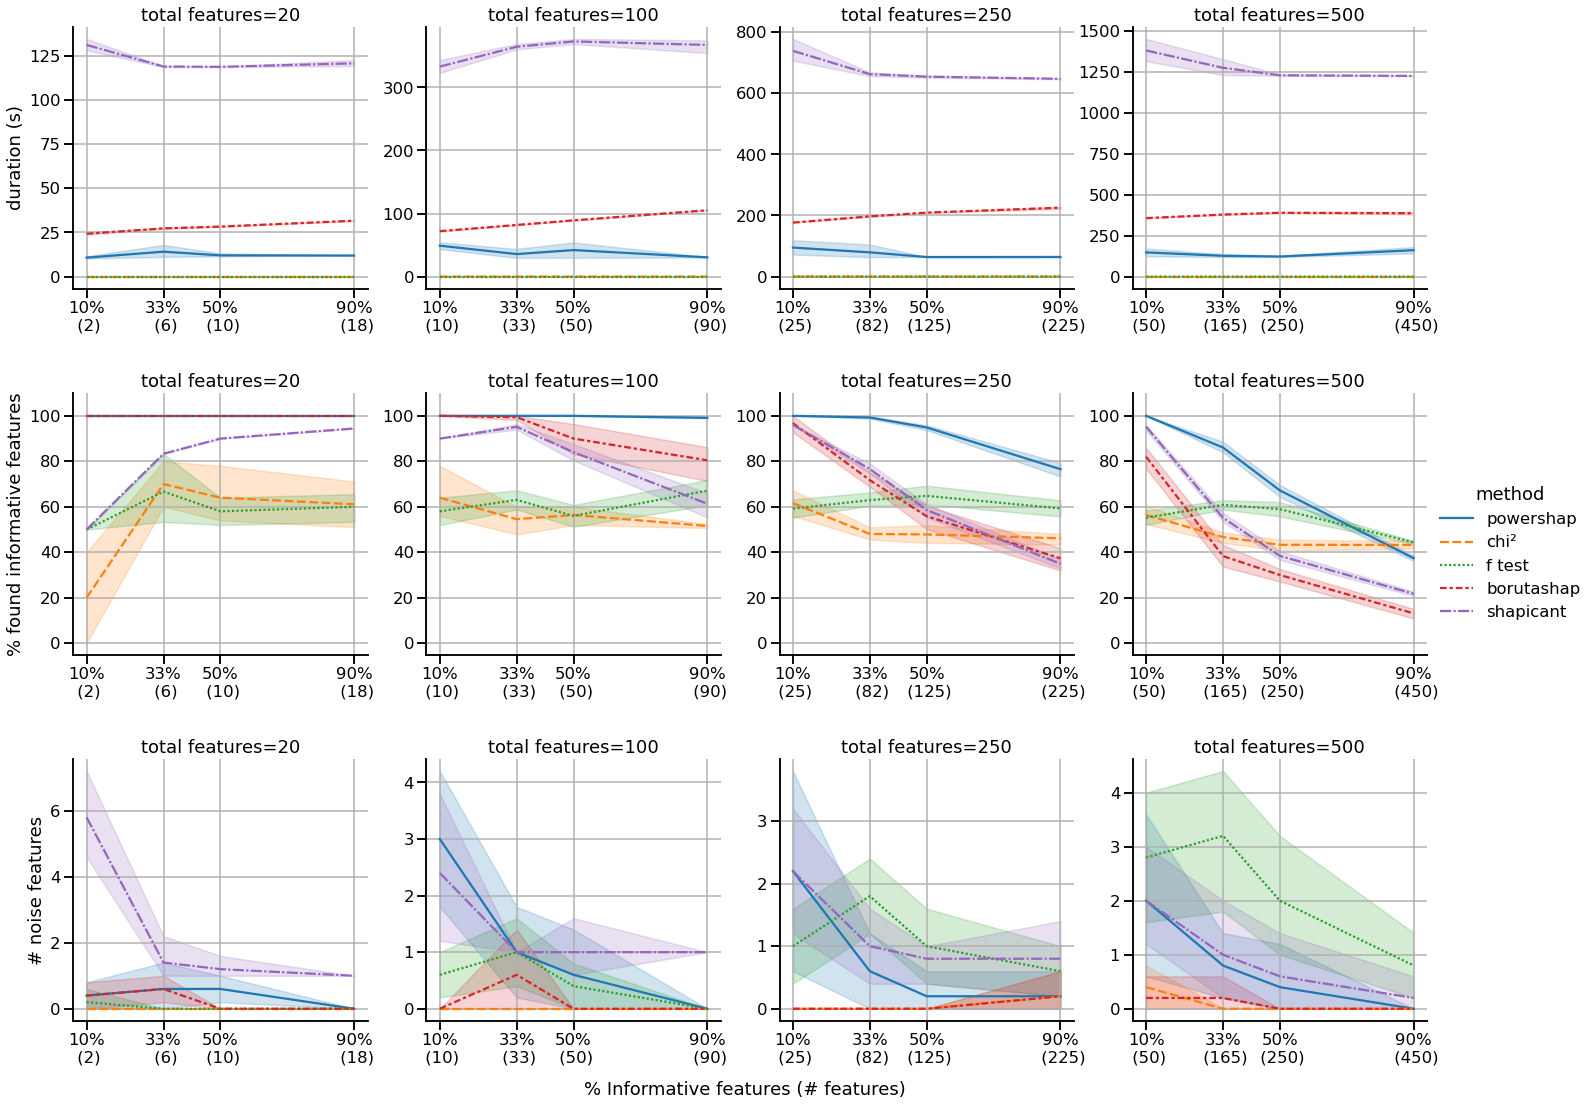

In [2]:
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

pure_powershap = False

df_esti_500 = pd.read_csv("results/estimators_500_Classification_output_df.csv")
df_esti_500["method"]="powershap - catboost - 500 est"
df_esti_250 = pd.read_csv("results/estimators_250_Classification_output_df.csv")
df_esti_250["method"]="powershap"# - catboost - 250 est"
df_esti_50 = pd.read_csv("results/estimators_50_Classification_output_df.csv")
df_esti_50["method"]="powershap - catboost - 50 est"

df_logreg = pd.read_csv("results/logisticregressioncv_output_df.csv")
df_logreg["method"]="powershap - logistic regression"
df_logreg_polytone = pd.read_csv("results/logisticregressioncv_output_df_polytone.csv")
df_logreg_polytone["method"]="logistic regression polytone"

df_chisq = pd.read_csv("results/chisquared_output_df.csv")
df_chisq["method"]="chi²"
df_chisq_poly = pd.read_csv("results/chi_squared_polytone_output_df.csv")
df_chisq_poly["method"]="chi polytone"

df_f_classif = pd.read_csv("results/f_classif_output_df.csv")
df_f_classif["method"]="f test"
df_f_classif_poly = pd.read_csv("results/f_classif_polytone_output_df.csv")
df_f_classif_poly["method"]="f_classif polytone"

df_random = pd.read_csv("results/randomforest_output_df.csv")
df_random["method"]="powershap - random forest"
t = df_random[df_random.n_samples==1000].copy()
t["n_samples"]=20000
df_random = df_random.append(t)

df_shapicant = pd.read_csv("results/shapicant_output_df.csv")
df_shapicant["method"]="shapicant"
t = df_shapicant[df_shapicant.total_features==20].copy()
t["total_features"]=50
df_shapicant = df_shapicant.append(t)
t = df_shapicant[df_shapicant.n_samples==5000].copy()
t["n_samples"]=20000
df_shapicant = df_shapicant.append(t)
t = df_shapicant[df_shapicant.n_samples==5000].copy()
t["n_samples"]=1000
df_shapicant = df_shapicant.append(t)

df_boruta = pd.read_csv("results/250_est_Catboost_borutashap_output_df.csv")
df_boruta["method"]="borutashap"

order_samples = [5000]#1000,5000,20000]
order_features = [20,100,250,500]


#df = df_esti_250.append(df_logreg).append(df_random).append(df_chisq).append(df_f_classif).append(df_boruta).append(df_shapicant)
#df = df_esti_250.append(df_chisq).append(df_f_classif).append(df_boruta).append(df_shapicant)

#df = df_esti_250.append(df_logreg).append(df_chisq).append(df_f_classif).append(df_boruta)

#df["model_samples"]=df["method"].values+"_"+df["n_samples"].map(lambda x: f"{x:,}").values

if pure_powershap:
    df = df_esti_50.append(df_esti_250).append(df_esti_500).append(df_logreg).append(df_random)
    df_n = 5
else:
    df = df_esti_250.append(df_chisq).append(df_f_classif).append(df_boruta).append(df_shapicant)
    df_n=5


df["%informative_features"]=np.tile(np.repeat([10,33,50,90],5),15*5)
df["%found_informative_features"]=df["found_informative_features"]/df["informative_features"]*100
df["%outputted_noise_features"]=df["outputted_noise_features"]/(df["total_features"]-df["informative_features"])*100

df = df.rename(columns={"total_features":"total features"})

df = df[df.n_samples.isin(order_samples)]
df = df[df["total features"].isin(order_features)]
df = df.drop(columns="n_samples")

sns.set_context("talk")
row_order = ["time","%found_informative_features", "outputted_noise_features"]#,"%outputted_noise_features"]
row_names = ["duration (s)","% found informative features", "# noise features"]#,"% noise features"]
#df["n_samples"] = df["n_samples"].map(lambda x: f"{x:,}")
g = sns.relplot(
    data=df.melt(
        id_vars=["total features","informative_features","method", "%informative_features"]
    ),
    kind="line",
    hue="method",
    #hue_order=["1,000","5,000","20,000"],
    x="%informative_features",
    style="method",
    y="value",
    col="total features",
    row="variable",
    palette="tab10",
    row_order=row_order,
    facet_kws={"sharey": False,"sharex":False},
    height=5,
)

g.set_titles("{col_var}={col_name}")

axis_all = g.axes

#for axs in axis_all[0]:
    #axs.set_yscale("log")
    #axs.yaxis.set_major_formatter(ScalarFormatter())
    #axs.set_ylim([1,800])
for axs in axis_all[1]:  
    axs.set_ylim([-5,110])


j_plot=0
for row_axs, row_name in zip(g.axes, row_names):
    row_axs[0].set_ylabel(row_name)
    
    for rows in row_axs:
        rows.grid()
        rows.set_xlabel("")
        rows.set_xticks(ticks=[10,33,50,90])
        rows.set_xticklabels(append_list_strings_dict(["10%\n","33%\n","50%\n","90%\n"],df[(df["total features"]==order_features[j_plot%5])&(df.seed==j_plot%5)].informative_features.values)) 
        j_plot = j_plot + 1
    j_plot = 0
    
#g.axes[-1][2].set_xlabel("% Informative features (# features)")
plt.text(-110, -1.5, "% Informative features (# features)", ha='center', va='center')


plt.subplots_adjust(wspace=0.2, hspace=0.4)


if pure_powershap:
    plt.savefig("results/powershap_performance_all_diff_models"+str(order_samples[0])+".jpg", bbox_inches="tight")
    plt.savefig("results/powershap_performance_all_diff_models"+str(order_samples[0])+".pdf", bbox_inches="tight")
    plt.savefig("results/powershap_performance_all_diff_models"+str(order_samples[0])+".svg", bbox_inches="tight")
    plt.savefig("results/powershap_performance_all_diff_models"+str(order_samples[0])+".png", bbox_inches="tight")
else:
    plt.savefig("results/total_perforamnce_all_models_"+str(order_samples[0])+".jpg", bbox_inches="tight")
    plt.savefig("results/total_perforamnce_all_models_"+str(order_samples[0])+".pdf", bbox_inches="tight")
    plt.savefig("results/total_perforamnce_all_models_"+str(order_samples[0])+".svg", bbox_inches="tight")
    plt.savefig("results/total_perforamnce_all_models_"+str(order_samples[0])+".png", bbox_inches="tight")

#plt.savefig("total_perforamnce_all_models_"+str(order_samples[0])+".jpg", bbox_inches="tight")
#plt.savefig("total_perforamnce_all_models_"+str(order_samples[0])+".pdf", bbox_inches="tight")
#plt.savefig("total_perforamnce_all_models_"+str(order_samples[0])+".svg", bbox_inches="tight")
#plt.savefig("total_perforamnce_all_models_"+str(order_samples[0])+".png", bbox_inches="tight")

#plt.savefig("classification_50_estimators_performance_plot.pdf", bbox_inches="tight")
#plt.savefig("classification_50_estimators_performance_plot.jpg", bbox_inches="tight")
#plt.savefig("classification_50_estimators_performance_plot.pdf", bbox_inches="tight")
#plt.savefig("logisticregression_cv_performance_plot.jpg", bbox_inches="tight")

# Benchmark Results 

In [10]:
import pandas as pd
import re

class_performances = ["scene_urban","gina_priori","madelon"]

end_class_df = []

for dataset in class_performances:

    df_t = pd.read_table("../../data/"+dataset+".md", sep="|", header=0, index_col=1, skipinitialspace=True) .dropna(axis=1, how='all').iloc[1:]   
    df_t = df_t.reset_index()
    df_t["dataset"]=dataset
    df_t.columns = df_t.columns.str.strip()
    
    df_t.loc[df_t["Eval set"]=="10f Cross-val ","Eval set"]='10f cross-val '

    for col in [ 'AUC', 'MCC', 'ACC','Recall', 'F1', 'Precision']:
        df_t[col+"_std"]=0
        df_t.loc[df_t[col].str.contains("\("),col+"_std"] = [pd.to_numeric(s[s.find("(")+1:s.find(")")]) for s in df_t[df_t[col].str.contains("\(")][col].values]
        df_t[col] = [pd.to_numeric(s[:s.find(" ")]) for s in df_t[col].values]
        
    if len(end_class_df) == 0:
        end_class_df = df_t.copy(deep=True)
    else:
        end_class_df = end_class_df.append(df_t)
        
end_class_df.loc[end_class_df["Eval set"]=="10f Cross-val ","Eval set"]='10f cross-val '
end_class_df.loc[end_class_df["Method"].str.contains("Automatic default powershap"),"Method"]='powershap'
end_class_df.loc[end_class_df["Method"].str.contains("Forward"),"Method"]='forward'
end_class_df.loc[end_class_df["Method"].str.contains("Boruto"),"Method"]='borutashap'
end_class_df.loc[end_class_df["Method"].str.contains("All fea"),"Method"]='default'
end_class_df.loc[end_class_df["Method"].str.contains("f_clas"),"Method"]='f test'
end_class_df.loc[end_class_df["Method"].str.contains("shapic"),"Method"]='shapicant'
end_class_df.loc[end_class_df["Method"].str.contains("Chi",flags=re.IGNORECASE),"Method"]='chi²'

end_class_df.loc[end_class_df["dataset"].str.contains("scene_urban",flags=re.IGNORECASE),"dataset"]='Scene'
end_class_df.loc[end_class_df["dataset"].str.contains("gina_priori",flags=re.IGNORECASE),"dataset"]='Gina priori'
end_class_df.loc[end_class_df["dataset"].str.contains("madelon",flags=re.IGNORECASE),"dataset"]='Madelon'

end_class_df = end_class_df.reset_index(drop=True)
end_class_df

,Method,# Features,Time,Eval set,AUC,MCC,ACC,Recall,F1,Precision,dataset,AUC_std,MCC_std,ACC_std,Recall_std,F1_std,Precision_std
0,powershap,36,1m55s,10f cross-val,0.929,0.606,0.904,0.904,0.897,0.900,Scene,0.018,0.520,0.021,0.021,0.024,0.023
1,borutashap,14,3m40s,10f cross-val,0.902,0.573,0.848,0.848,0.858,0.880,Scene,0.030,0.078,0.032,0.032,0.030,0.028
2,shapicant,56,12m28s,10f cross-val,0.937,0.650,0.897,0.897,0.891,0.892,Scene,0.026,0.064,0.025,0.025,0.027,0.027
3,forward,15,208m16s,10f cross-val,0.927,0.643,0.878,0.878,0.884,0.898,Scene,0.032,0.090,0.039,0.039,0.036,0.030
4,chi²,93,1s,10f cross-val,0.911,0.583,0.856,0.856,0.864,0.881,Scene,0.030,0.078,0.037,0.037,0.034,0.026
5,f test,220,1s,10f cross-val,0.927,0.636,0.880,0.880,0.885,0.894,Scene,0.028,0.066,0.031,0.031,0.029,0.027
6,default,294,N/A,10f cross-val,0.929,0.650,0.886,0.886,0.890,0.897,Scene,0.029,0.075,0.034,0.034,0.033,0.031
7,powershap,36,1m55s,test set,0.892,0.556,0.884,0.884,0.872,0.876,Scene,0.020,0.000,0.000,0.000,0.000,0.000
8,borutashap,14,3m40s,test set,0.890,0.562,0.867,0.670,0.867,0.871,Scene,0.021,0.000,0.000,0.000,0.000,0.000
9,shapicant,56,12m28s,test set,0.905,0.576,0.888,0.888,0.877,0.883,Scene,0.018,0.054,0.016,0.016,0.018,0.018


In [11]:
reggr_performances = ["ct_location","appliances"]

regr_end_df = []

for dataset in reggr_performances:

    df_t = pd.read_table("../../data/"+dataset+".md", sep="|", header=0, index_col=1, skipinitialspace=True) .dropna(axis=1, how='all').iloc[1:]   
    df_t = df_t.reset_index()
    df_t["dataset"]=dataset
    df_t.columns = df_t.columns.str.strip()
    df_t.loc[df_t["Eval set"]=="10f Cross-val ","Eval set"]='10f cross-val '

    for col in ['R²','RMSE','MAE','ME']:
        df_t[col+"_std"]=0
        df_t.loc[df_t[col].str.contains("\("),col+"_std"] = [pd.to_numeric(s[s.find("(")+1:s.find(")")]) for s in df_t[df_t[col].str.contains("\(")][col].values]
        df_t[col] = [pd.to_numeric(s[:s.find(" ")]) for s in df_t[col].values]
        
    if len(regr_end_df) == 0:
        regr_end_df = df_t.copy(deep=True)
    else:
        regr_end_df = regr_end_df.append(df_t)

regr_end_df.loc[regr_end_df["Method"].str.contains("Automatic default powershap"),"Method"]='powershap'
regr_end_df.loc[regr_end_df["Method"].str.contains("Forward"),"Method"]='forward'
regr_end_df.loc[regr_end_df["Method"].str.contains("Boruto"),"Method"]='borutashap'
regr_end_df.loc[regr_end_df["Method"].str.contains("All fea"),"Method"]='default'
regr_end_df.loc[regr_end_df["Method"].str.contains("shapic"),"Method"]='shapicant'
regr_end_df.loc[regr_end_df["Method"].str.contains("f_regr"),"Method"]='f test'

regr_end_df.loc[regr_end_df["dataset"].str.contains("ct_location",flags=re.IGNORECASE),"dataset"]='CT location'
regr_end_df.loc[regr_end_df["dataset"].str.contains("appliances",flags=re.IGNORECASE),"dataset"]='Appliances'

regr_end_df = regr_end_df.reset_index(drop=True)
regr_end_df

,Method,# Features,Time,Eval set,R²,RMSE,MAE,ME,dataset,R²_std,RMSE_std,MAE_std,ME_std
0,powershap,146,7m39s,10f cross-val,0.919,6.294,3.962,-0.406,CT location,0.032,1.389,0.706,0.897
1,borutashap,164,9m3s,10f cross-val,0.913,6.290,3.983,-0.537,CT location,0.034,1.279,0.670,0.835
2,shapicant,74,25m53s,10f cross-val,0.918,6.067,0.000,0.000,CT location,0.037,1.358,0.000,0.000
3,forward,25,947m59s,10f cross-val,0.926,5.864,3.916,-0.173,CT location,0.022,0.834,0.528,0.698
4,f test,350,1s,10f cross-val,0.907,6.503,4.136,-0.563,CT location,0.037,1.377,0.721,0.762
5,default,384,N/A,10f cross-val,0.908,6.500,4.071,-0.528,CT location,0.036,1.309,0.713,0.921
6,powershap,123,7m39s,test set,0.888,6.903,4.140,0.157,CT location,0.004,0.000,0.000,0.000
7,borutashap,164,9m3s,test set,0.882,7.319,4.329,0.238,CT location,0.005,0.000,0.000,0.000
8,shapicant,74,25m53s,test set,0.880,7.345,0.000,0.000,CT location,0.005,0.149,0.000,0.000
9,forward,25,947m59s,test set,0.838,8.564,5.031,-0.064,CT location,0.006,0.000,0.000,0.000


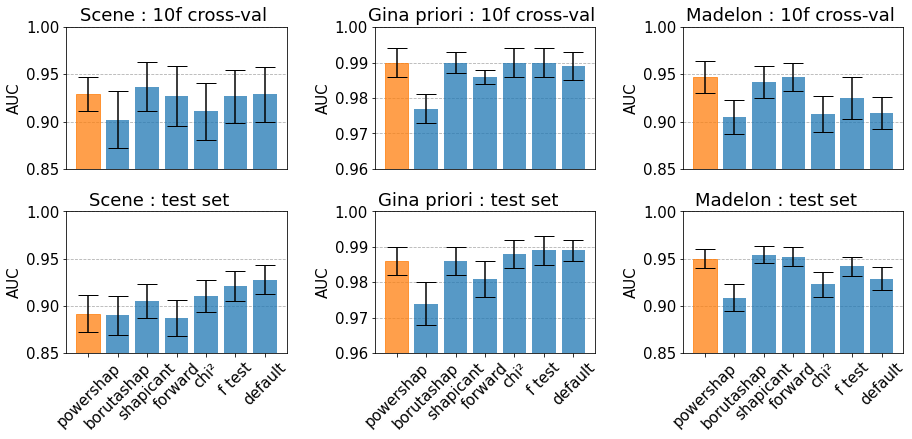

In [12]:
metric = "AUC"

plt.rcParams.update({'font.size': 15})

i = 0
f, axs = plt.subplots(2,3,figsize=(15,6))
for evalset in end_class_df["Eval set"].unique():
    j = 0
    for dataset in end_class_df.dataset.unique():
        current_df = end_class_df[(end_class_df.dataset==dataset)&(end_class_df["Eval set"]==evalset)]
        barplot_object = axs[i][j].bar(current_df.Method.values,current_df[metric].values, yerr = current_df[metric+"_std"].values,capsize=10,color="#1f77b4",alpha=0.75)
        barplot_object[0].set_color("#ff7f0e")
        axs[i][j].set_ylabel(metric)
        if i != 1:
            axs[i][j].get_xaxis().set_visible(False)#.tick_params(axis='x',labelbottom='false',which='both')
        else:
            axs[i][j].tick_params(axis='x', rotation=45)
        
        if j == 0:
            axs[0][j].set_ylim([0.85,1.0])
            axs[1][j].set_ylim([0.85,1.0])
        elif j == 1:
            axs[0][j].set_ylim([0.96,1.0])
            axs[0][j].set_yticks([0.96,0.97,0.98,0.99,1.0])
            axs[1][j].set_ylim([0.96,1.0])
            axs[1][j].set_yticks([0.96,0.97,0.98,0.99,1.0])
            
        else:
            axs[0][j].set_ylim([0.85,1.0])
            axs[1][j].set_ylim([0.85,1.0])
        
        #axs[i][j].set_ylim([np.min(current_df[metric].values)-np.max([0.025,np.max(current_df[metric+"_std"].values)+0.02]),np.min([1.000,np.max(current_df[metric].values)+np.max(current_df[metric+"_std"].values)+0.1])])
        
        axs[i][j].set_title(dataset + " : "+evalset)
        axs[i][j].yaxis.grid(True,linestyle='--')
        axs[i][j].set_axisbelow(True)
        j = j+1

    i = i + 1
    
plt.subplots_adjust(wspace=0.4, hspace=0.3)

plt.savefig("results/benchmark_performance_all_methods_class.jpg", bbox_inches="tight")
plt.savefig("results/benchmark_performance_all_methods_class.pdf", bbox_inches="tight")
plt.savefig("results/benchmark_performance_all_methods_class.svg", bbox_inches="tight")
plt.savefig("results/benchmark_performance_all_methods_class.png", bbox_inches="tight")

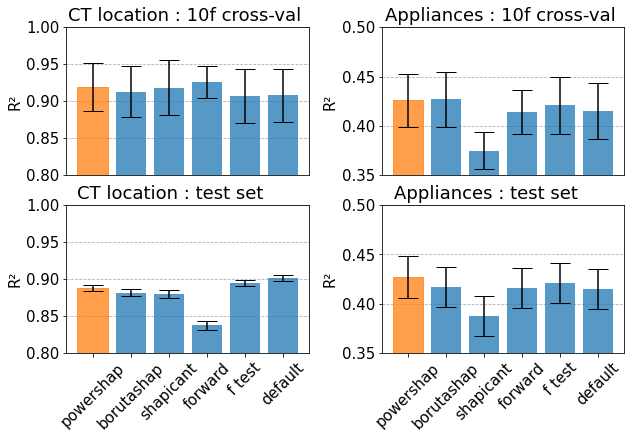

In [13]:
metric = "R²"

i = 0
f, axs = plt.subplots(2,2,figsize=(10,6))
for evalset in regr_end_df["Eval set"].unique():
    j = 0
    for dataset in regr_end_df.dataset.unique():
        current_df = regr_end_df[(regr_end_df.dataset==dataset)&(regr_end_df["Eval set"]==evalset)]
        
        barplot_object = axs[i][j].bar(current_df.Method.values,current_df[metric].values, yerr = current_df[metric+"_std"].values,capsize=10,color="#1f77b4",alpha=0.75)
        barplot_object[0].set_color("#ff7f0e")
        axs[i][j].set_ylabel(metric)
        if i != 1:
            axs[i][j].get_xaxis().set_visible(False)#.tick_params(axis='x',labelbottom='false',which='both')
        else:
            axs[i][j].tick_params(axis='x', rotation=45)
        
        if j == 1:
            axs[0][j].set_ylim([0.350,0.5])
            axs[1][j].set_ylim([0.350,0.5])
        else:
            axs[0][j].set_ylim([0.8,1.0])
            axs[1][j].set_ylim([0.8,1.0])
        
        axs[i][j].set_title(dataset + " : "+evalset)
        axs[i][j].yaxis.grid(True,linestyle='--')
        axs[i][j].set_axisbelow(True)
        
        j = j+1

    #f.show()
    i = i + 1
    
plt.subplots_adjust(wspace=0.3, hspace=0.2)

plt.savefig("results/benchmark_performance_all_methods_regres.jpg", bbox_inches="tight")
plt.savefig("results/benchmark_performance_all_methods_regres.pdf", bbox_inches="tight")
plt.savefig("results/benchmark_performance_all_methods_regres.svg", bbox_inches="tight")
plt.savefig("results/benchmark_performance_all_methods_regres.png", bbox_inches="tight")

## Illustration power calculations

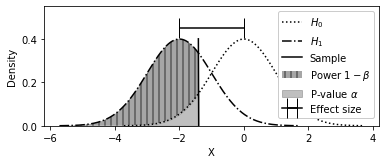

In [102]:
from scipy.stats import norm
plt.figure(figsize=(6,2.2))
x = np.linspace(norm.ppf(0.0001),norm.ppf(0.9999), 1000)
plt.plot(x, norm.pdf(x),color="black",label=r"$H_0$",linestyle=":")
plt.plot(x-2, norm.pdf(x),color="black",label=r"$H_1$",linestyle="-.")
plt.fill_between((x-2)[:np.max(np.where((x-2)<-1.4))],norm.pdf(x[:np.max(np.where(x<-1.4+2))]),label=r"Power $1-\beta$",color="gray",alpha=0.7, hatch="||", edgecolor="black", linewidth=0.0)
plt.fill_between(x[:np.max(np.where(x<-1.4))],norm.pdf(x[:np.max(np.where(x<-1.4))]),color="white")
plt.fill_between(x[:np.max(np.where(x<-1.4))],norm.pdf(x[:np.max(np.where(x<-1.4))]),label=r"P-value $\alpha$",color="gray",alpha=0.5)
plt.plot([-1.4,-1.41],[0,0.4],color="black",label="Sample")
plt.errorbar([-1],[0.45],xerr=[1],linestyle="-",color="black",capsize=10,label="Effect size")
leg = plt.legend(loc="upper right")
leg.get_frame().set_alpha(1)
plt.ylim([0,0.55])
plt.xlabel("X")
plt.ylabel("Density")
plt.savefig("results/power_p_value_explanation.pdf", bbox_inches="tight")